In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json

from functions import histogram, huffman, image_compressor, byte_stream_generator

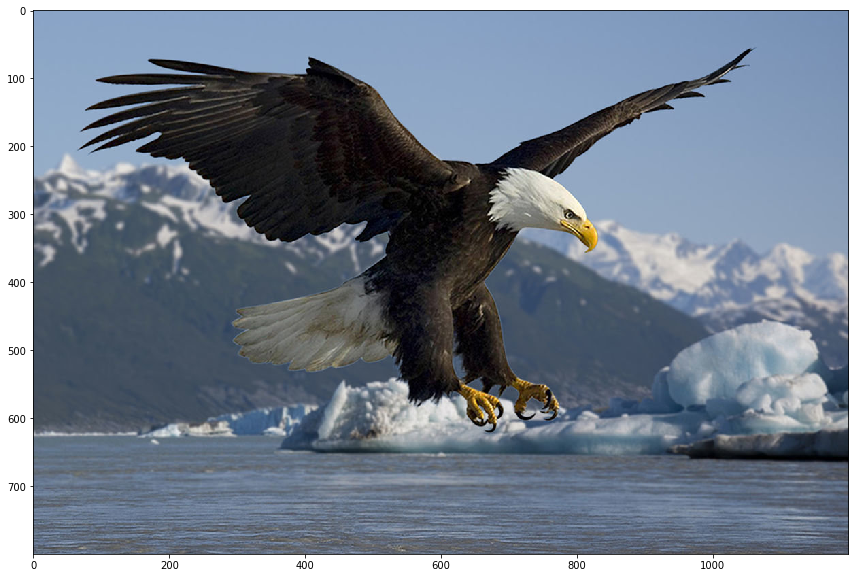

In [2]:
original_image = cv2.imread('images/Eagle.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Plot original image
plt.figure(figsize=(20,10))
plt.imshow(original_image)
# original_image.shape

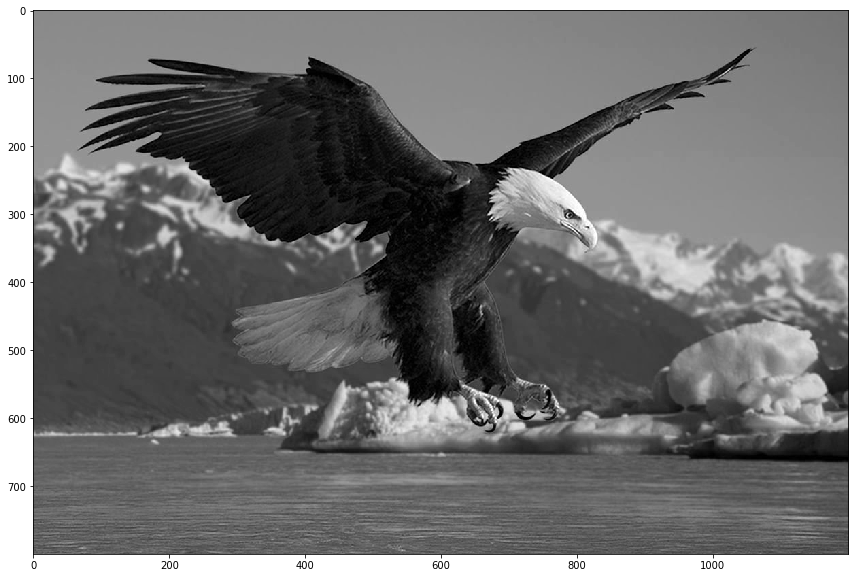

In [3]:
# Extracting the red screen
red_scale_image = original_image[:,:,0]

# Plot original image
plt.figure(figsize=(15,10))
plt.imshow(red_scale_image, cmap='gray', vmin=0, vmax=255)

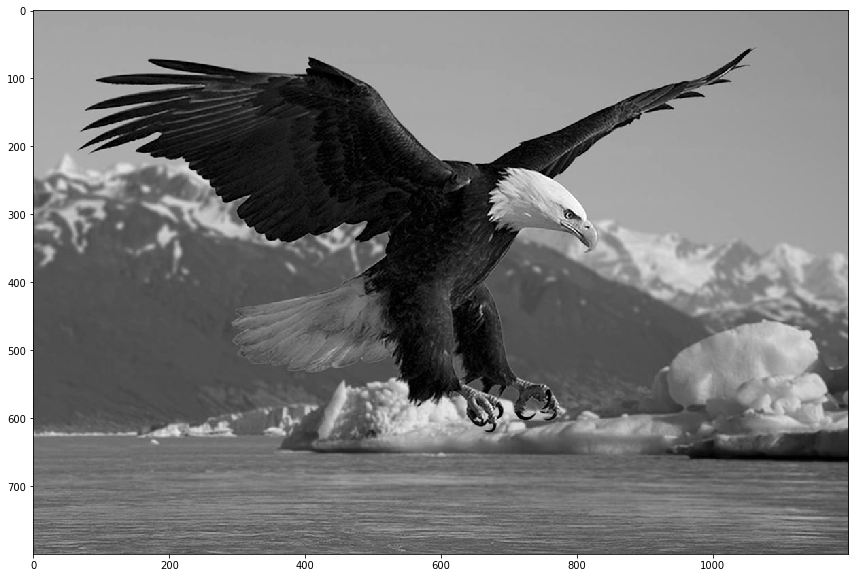

In [4]:
# Extracting the green screen
green_scale_image = original_image[:,:,1]

# Plot original image
plt.figure(figsize=(15,10))
plt.imshow(green_scale_image, cmap='gray', vmin=0, vmax=255)

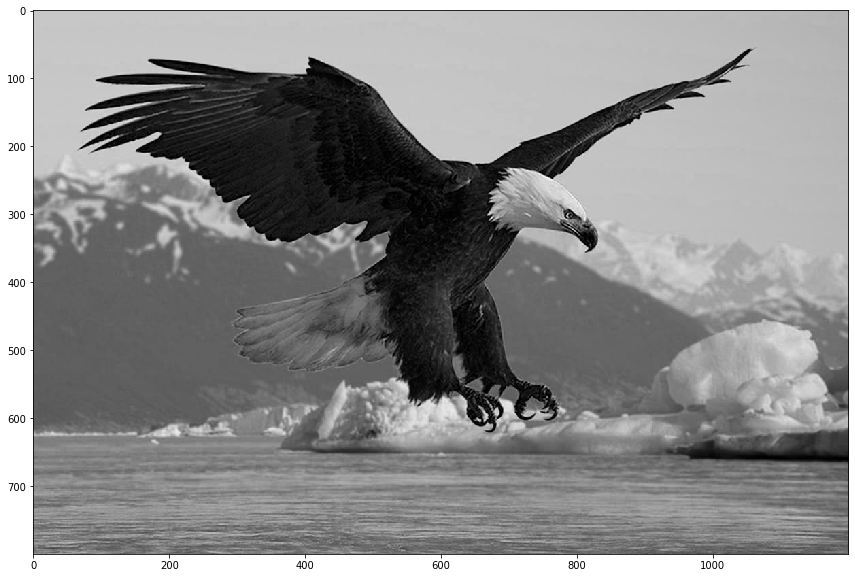

In [5]:
# Extracting the blue screen
blue_scale_image = original_image[:,:,2]

# Plot original image
plt.figure(figsize=(15,10))
plt.imshow(blue_scale_image, cmap='gray', vmin=0, vmax=255)

In [6]:
# # Plotting using OpenCV (for detailed comparison)
# cv2.imshow('Red channel', red_scale_image)
# cv2.imshow('Green channel', green_scale_image)
# cv2.imshow('Blue channel', blue_scale_image)
# cv2.waitKey(0)

In [7]:
# Assigning arrays for creating a histogram
red_channel_histogram_array = histogram.histogram_array_generator(red_scale_image)
green_channel_histogram_array = histogram.histogram_array_generator(green_scale_image)
blue_channel_histogram_array = histogram.histogram_array_generator(blue_scale_image)

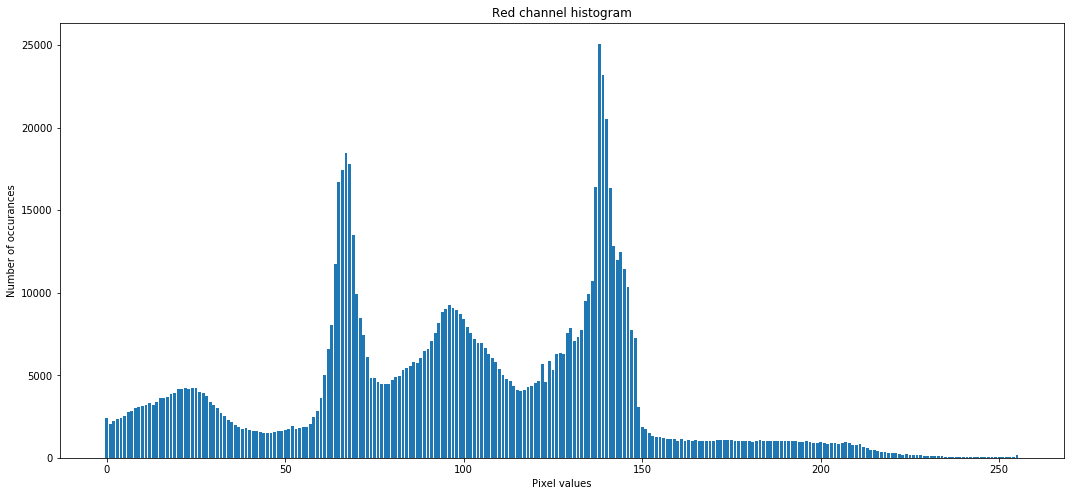

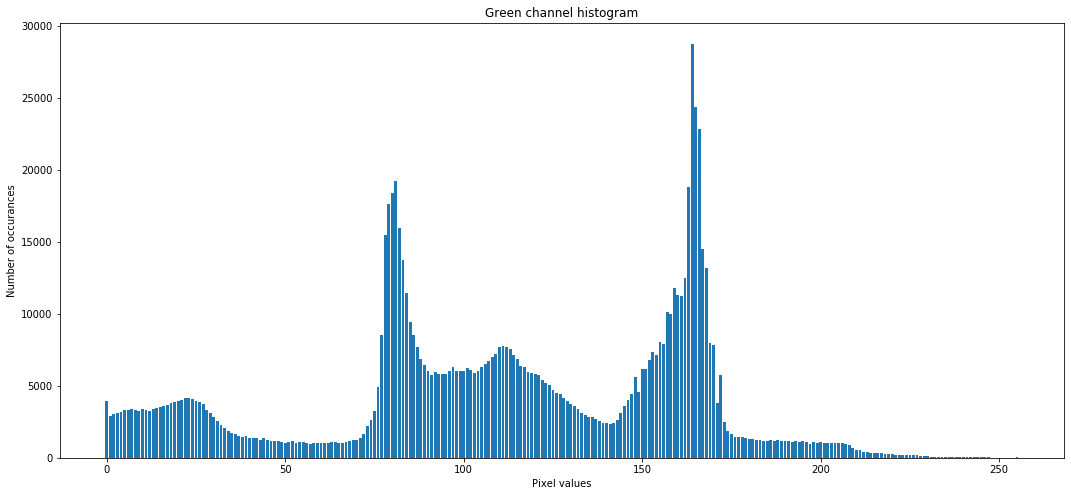

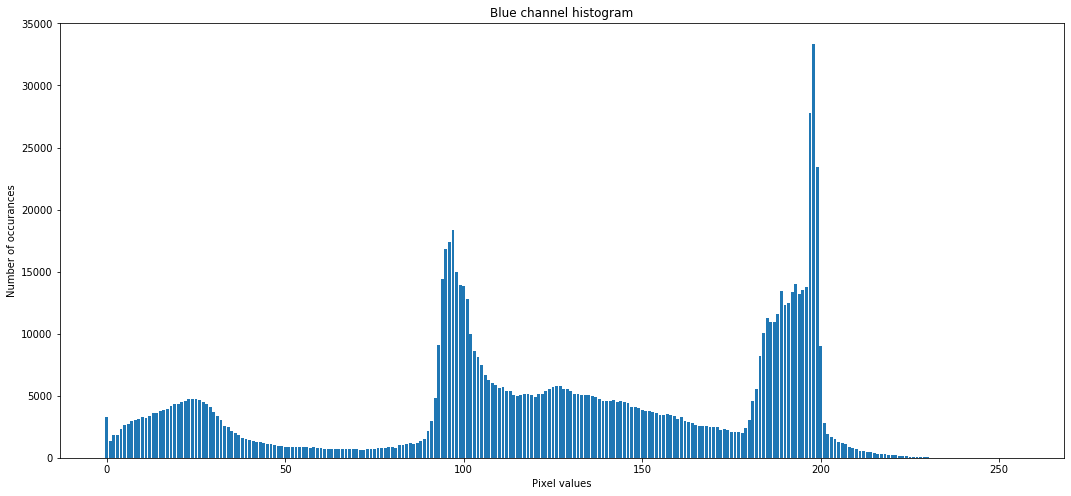

In [8]:
histogram.histogram_generator(red_channel_histogram_array, green_channel_histogram_array, blue_channel_histogram_array)

In [9]:
# For plotting histogram based on probability distribution

red_channel_probability_distribution = histogram.probability_distribution_generator(red_channel_histogram_array, 800*1200)
green_channel_probability_distribution = histogram.probability_distribution_generator(green_channel_histogram_array, 800*1200)
blue_channel_probability_distribution = histogram.probability_distribution_generator(blue_channel_histogram_array, 800*1200)

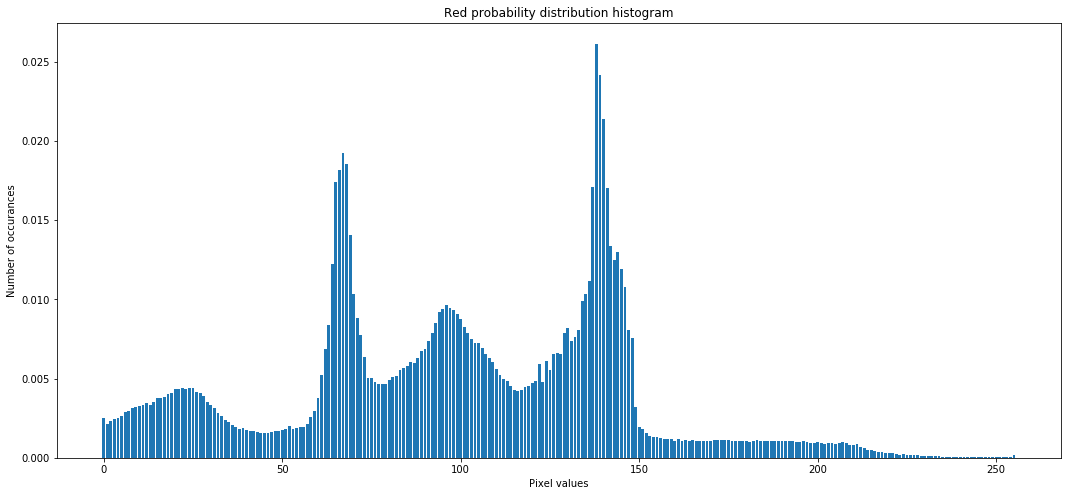

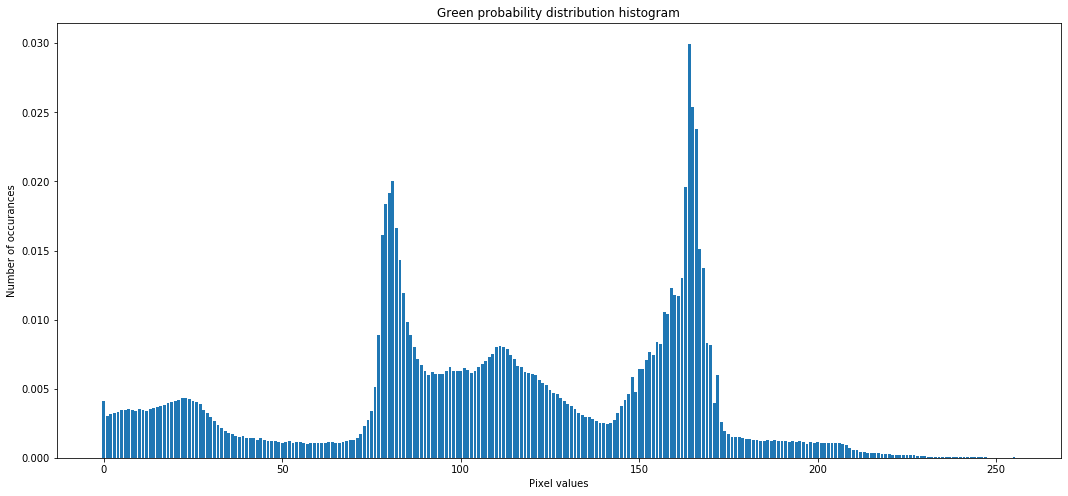

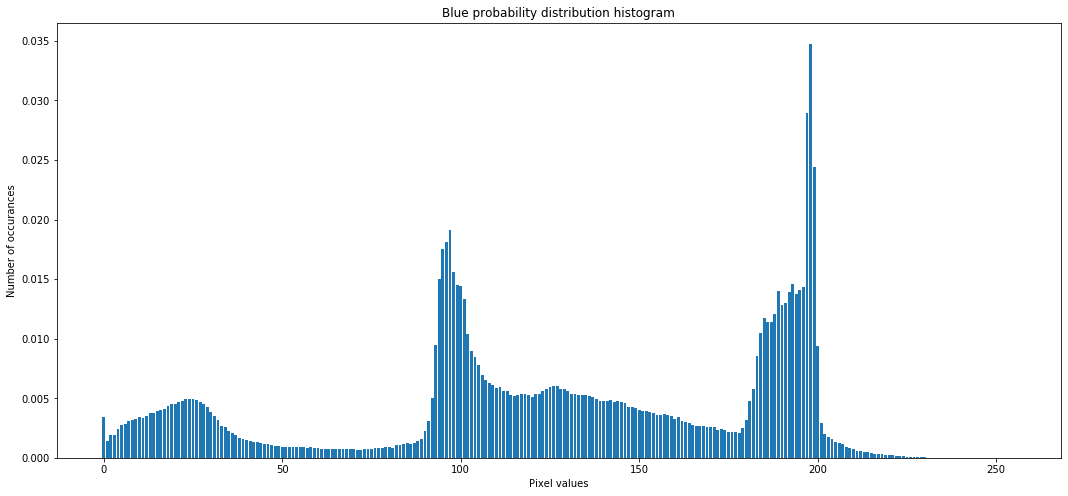

In [10]:
histogram.probability_distribution_histogram_generator(red_channel_probability_distribution, green_channel_probability_distribution, blue_channel_probability_distribution)

In [11]:
red_channel_probability_distribution['seperator'] = 0
red_huffman_coding = huffman.Huffman_Coding(red_channel_probability_distribution)
red_coded_pixels, red_reverse_coded_pixels = red_huffman_coding.compress()

In [12]:
green_channel_probability_distribution['seperator'] = 0
green_huffman_coding = huffman.Huffman_Coding(green_channel_probability_distribution)
green_coded_pixels, green_reverse_coded_pixels = green_huffman_coding.compress()

In [13]:
blue_huffman_coding = huffman.Huffman_Coding(blue_channel_probability_distribution)
blue_coded_pixels, blue_reverse_coded_pixels = blue_huffman_coding.compress()

In [14]:
with open('codes/red_channel_codes.json', 'w') as fp:
    json.dump(red_coded_pixels,fp)
with open('decodes/red_channel_decodes.json', 'w') as fp:
    json.dump(red_reverse_coded_pixels,fp)

In [15]:
with open('codes/green_channel_codes.json', 'w') as fp:
    json.dump(green_coded_pixels,fp)
with open('decodes/green_channel_decodes.json', 'w') as fp:
    json.dump(green_reverse_coded_pixels,fp)

In [16]:
with open('codes/blue_channel_codes.json', 'w') as fp:
    json.dump(blue_coded_pixels,fp)
with open('decodes/blue_channel_decodes.json', 'w') as fp:
    json.dump(blue_reverse_coded_pixels,fp)

In [17]:
red_channel_compressed_image = image_compressor.compressor(red_scale_image, red_coded_pixels)
green_channel_compressed_image = image_compressor.compressor(green_scale_image, green_coded_pixels)
blue_channel_compressed_image = image_compressor.compressor(blue_scale_image, blue_coded_pixels)

In [18]:
bit_stream = byte_stream_generator.byte_stream(red_channel_compressed_image, green_channel_compressed_image, blue_channel_compressed_image, red_coded_pixels['seperator'], green_coded_pixels['seperator'])

In [19]:
len(bit_stream)

20879233

In [20]:
with open('bit_stream.txt', 'w') as fp:
    fp.write(bit_stream)